A quickstart uses official tutorials:

https://www.tensorflow.org/tutorials


* Beginner - quick start
    * https://www.tensorflow.org/tutorials/quickstart/beginner

* Advanced - quick start
    * https://www.tensorflow.org/tutorials/quickstart/advanced 



# Beginner 

In [1]:
import tensorflow as tf


In [88]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [89]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [90]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.19630554, -0.07382584,  0.05313271,  0.40006453,  0.06709085,
         0.5375489 ,  0.58882535, -0.3382105 , -0.61644804, -0.8799564 ]],
      dtype=float32)

In [91]:
tf.nn.softmax(predictions).numpy()

array([[0.11120342, 0.08487926, 0.09636936, 0.13633569, 0.09772393,
        0.15642937, 0.16465971, 0.06515996, 0.04933371, 0.03790561]],
      dtype=float32)

In [92]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [93]:
loss_fn(y_train[:1], predictions).numpy()


1.8551507

In [94]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [95]:
model.fit(x_train, y_train, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2981 - accuracy: 0.9137
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1464 - accuracy: 0.9564
Epoch 3/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1119 - accuracy: 0.9665
Epoch 4/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0890 - accuracy: 0.9727
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0752 - accuracy: 0.9769


In [96]:
model.evaluate(x_test,  y_test, verbose=2)


10000/10000 - 0s - loss: 0.0763 - accuracy: 0.9766


[0.07630747741842643, 0.9766]

 ```note they recommend wraping the softmax function outside the model when training (since it interacts badly with the model optimization)```

In [97]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [98]:
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.2662520e-08, 5.2102229e-09, 8.8458983e-05, 2.1453889e-04,
        4.5426819e-11, 2.0428702e-07, 2.7462071e-13, 9.9967968e-01,
        5.3695624e-07, 1.6546177e-05],
       [2.3549601e-06, 8.1995362e-04, 9.9899668e-01, 1.7294462e-04,
        2.5276615e-16, 5.8935316e-06, 3.6684321e-07, 7.9838229e-14,
        1.8429955e-06, 8.8249438e-13],
       [1.7736401e-08, 9.9921823e-01, 2.2034284e-05, 6.0105767e-06,
        2.8800761e-05, 3.9366705e-06, 1.2510861e-06, 5.2341109e-04,
        1.9590701e-04, 3.6436438e-07],
       [9.9998569e-01, 5.7681859e-09, 8.7398103e-06, 8.1855781e-08,
        2.2584836e-09, 5.3568363e-07, 2.7700448e-06, 1.8309664e-06,
        1.5045844e-08, 2.4133575e-07],
       [5.8856335e-07, 6.2914047e-08, 7.6895203e-06, 9.6840267e-08,
        9.9834466e-01, 9.0971106e-08, 1.3870955e-06, 8.6051681e-05,
        7.5744797e-06, 1.5517876e-03]], dtype=float32)>

# Beginner - Playground

In [99]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# display results

(60000, 28, 28)

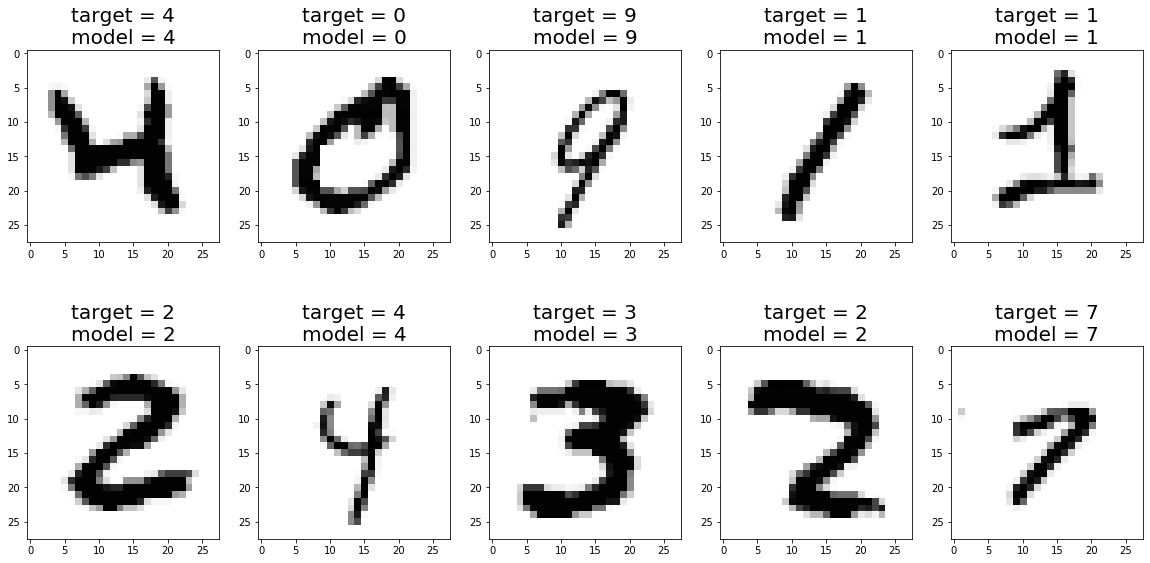

In [176]:
display(x_train.shape)
_, img_rows, img_cols = x_train.shape

fig,ax = plt.subplots(2,5,figsize=(20,10))

axx = ax.reshape(-1)
for id,i in enumerate(range(20,30)):

    
    axx[id].imshow(x_train[i],cmap ='Greys')

    result = probability_model.predict(x_train[i].reshape(1, img_rows , img_cols))
    axx[id].set_title(
        "target = {target}\nmodel = {model}".format(
            target = y_train[i]
            , model =result.argmax()
        )
        ,fontsize=(20)
    )


    

----
---
---

# Advanced - quickstart

In [13]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [15]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [16]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [17]:
# Build the tf.keras model using the Keras model subclassing API:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model_adv = MyModel()

In [18]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [19]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [20]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model_adv(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model_adv.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [21]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model_adv(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [22]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch + 1,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        test_loss.result(),
                        test_accuracy.result() * 100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.13300389051437378, Accuracy: 95.9383316040039, Test Loss: 0.061587944626808167, Test Accuracy: 97.88999938964844
Epoch 2, Loss: 0.0424623042345047, Accuracy: 98.6933364868164, Test Loss: 0.053958844393491745, Test Accuracy: 98.22000122070312
Epoch 3, Loss: 0.022886641323566437, Accuracy: 99.22333526611328, Test Loss: 0.05323723703622818, Test Accuracy: 98.2699966430664
Epoch 4, Loss: 0.012958868406713009, Accuracy: 99.57500457763672, Test Loss: 0.058521971106529236, Test Accuracy: 98.29